In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass

In [2]:
@dataclass
class Line:
    start: int
    duration: int
    cut: bool =  False

    def line(self):
        return plt.Line2D((0,self.duration), (self.start, self.duration+self.start), lw=2)
    
def plot_lines(ax, lines):
    for l in lines:
        ax.add_line(l.line())
    ax.plot([0]*len(lines), [l.start for l in lines], marker='o', markersize=10, color="green", label="creation")
    ax.plot([l.duration for l in lines], [l.duration+l.start for l in lines], marker='x', markersize=10, color="red", label="deletion", linestyle = 'None')

In [20]:
def setup(sizex, sizey, base):
    fig, ax = plt.subplots(figsize=(20,10))
    
    major_yticks = np.arange(0, sizey, base)
    major_xticks = np.power(2, np.arange(0, sizex, 1))

    ax.set_xticks(major_xticks)
    ax.set_xticks(np.arange(0, sizex, 1), minor=True)
    ax.set_yticks(major_yticks)
    ax.set_yticks(np.arange(0, sizey, 1), minor=True)

    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    ax.set_xlim(-1, sizex)
    ax.set_ylim(-1, sizey)
    return fig, ax

In [21]:
def compute_duration(start, base):
    for i in range(base):
        if (start - (2 ** i)) % 2**(i+1) == 0:
            return 2**(i+1)
    return 2 ** (base+1)
def generate_lines(num, base):
    return [
        Line(start=i, duration=compute_duration(i, base))
        for i in range(0, num)
    ]

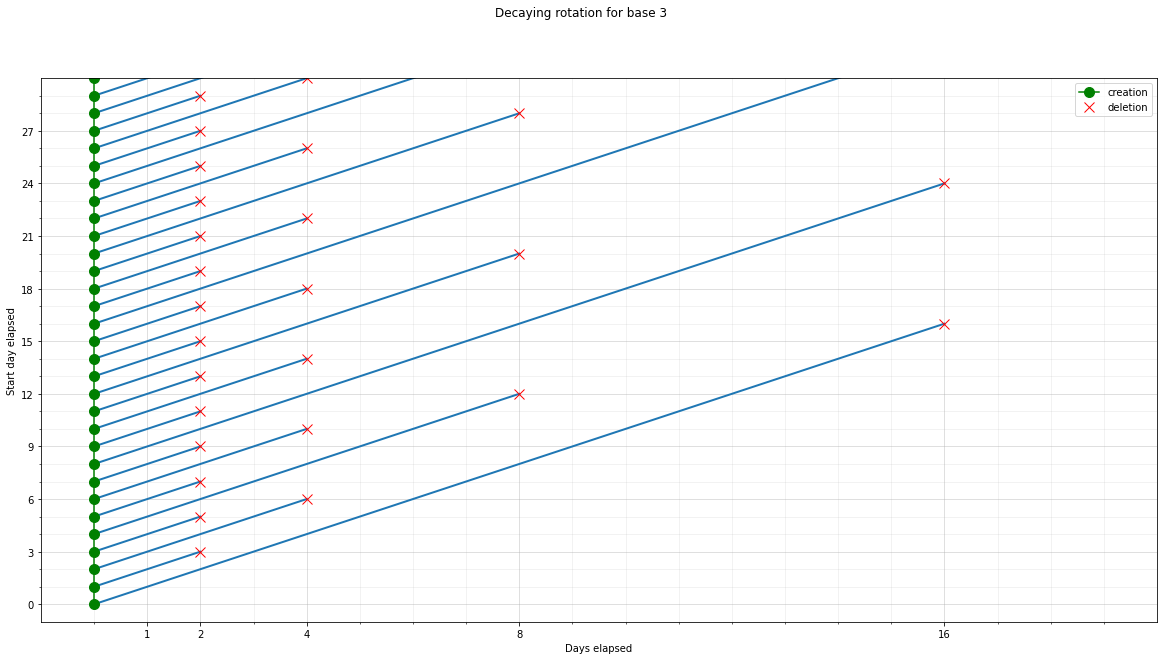

In [22]:
BASE = 3

fig, ax = setup(20, 30, BASE)
ax.set_xlabel("Days elapsed")
ax.set_ylabel("Start day elapsed")

plot_lines(ax, generate_lines(50, BASE))
fig.suptitle(f"Decaying rotation for base {BASE}")
plt.legend()
fig.savefig("base3.png", bbox_inches='tight', pad_inches=0.1, facecolor='#b4cbd1')

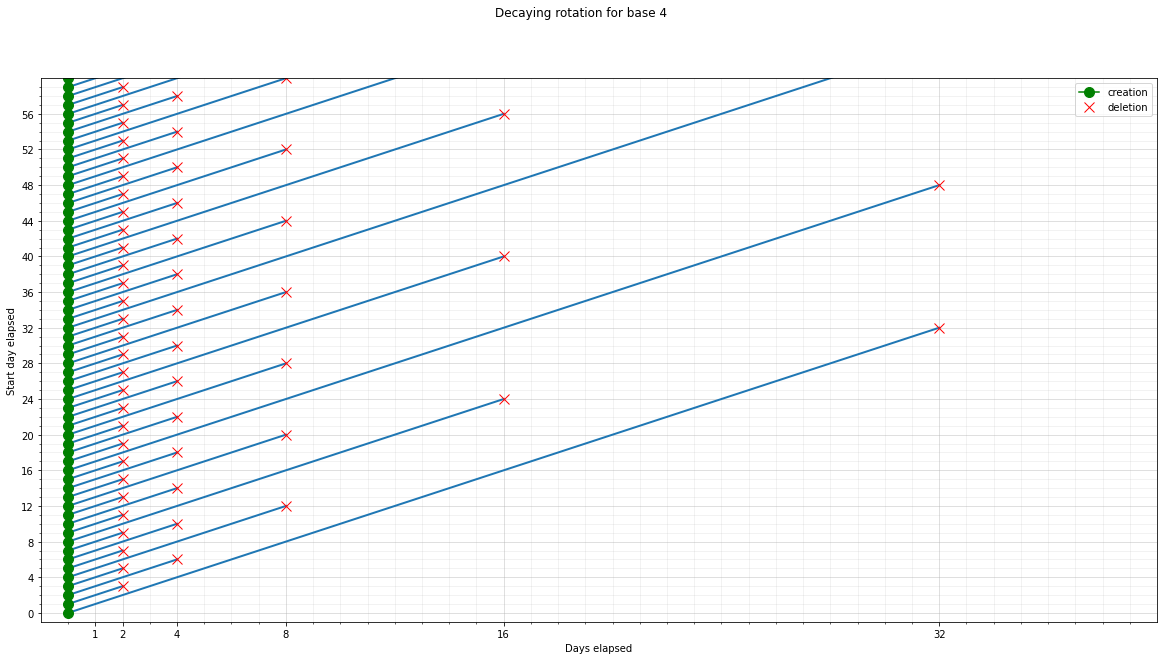

In [25]:
BASE = 4

fig, ax = setup(40, 60, BASE)
ax.set_xlabel("Days elapsed")
ax.set_ylabel("Start day elapsed")

plot_lines(ax, generate_lines(65, BASE))
fig.suptitle(f"Decaying rotation for base {BASE}")
plt.legend()
fig.savefig("base4.png", bbox_inches='tight', pad_inches=0.1, facecolor='#b4cbd1')